In [2]:
# imports
from keras.applications import vgg16
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras.models import Model
from keras.applications.imagenet_utils import preprocess_input

from PIL import Image
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
imgs_path = "/../Documents/dataset/dataset_all_products/"
imgs_model_width, imgs_model_height = 224, 224
nb_closest_images = 5 # number of most similar images to retrieve

In [6]:
# load the model
vgg_model = vgg16.VGG16(weights='imagenet')

# remove the last layers in order to get features instead of predictions
feat_extractor = Model(inputs=vgg_model.input, outputs=vgg_model.get_layer("fc2").output)

# print the layers of the CNN
feat_extractor.summary()

2023-05-11 20:04:53.733612: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 411041792 exceeds 10% of free system memory.
2023-05-11 20:04:53.891543: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 411041792 exceeds 10% of free system memory.
2023-05-11 20:04:54.071868: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 411041792 exceeds 10% of free system memory.


2023-05-11 20:04:54.524295: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 67108864 exceeds 10% of free system memory.
2023-05-11 20:04:54.545169: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 67108864 exceeds 10% of free system memory.


553467096/553467096 [==============================] - 523s 1us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                          

In [13]:
files = [imgs_path + x for x in os.listdir(imgs_path) if "jpg" in x]

print("number of images:",len(files))

FileNotFoundError: [Errno 2] No such file or directory: '/../Documents/dataset/dataset_all_products/'

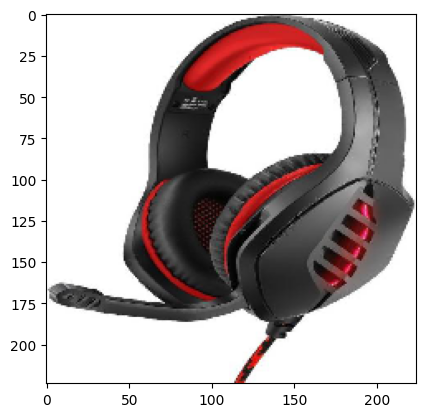

image loaded successfully!


In [6]:
# load an image in PIL format
original = load_img(files[0], target_size=(imgs_model_width, imgs_model_height))
plt.imshow(original)
plt.show()
print("image loaded successfully!")

In [7]:
%%time
# convert the PIL image to a numpy array

numpy_image = img_to_array(original)

# convert the image / images into batch format

image_batch = np.expand_dims(numpy_image, axis=0)
print('image batch size', image_batch.shape)

# prepare the image for the VGG model
processed_image = preprocess_input(image_batch.copy())

image batch size (1, 224, 224, 3)
CPU times: user 3.85 ms, sys: 0 ns, total: 3.85 ms
Wall time: 3.76 ms


In [8]:
%%time
# get the extracted features
img_features = feat_extractor.predict(processed_image)

print("features successfully extracted!")
print("number of image features:",img_features.size)
img_features

1/1 [==============================] - 1s 1s/step
features successfully extracted!
number of image features: 4096
CPU times: user 1.36 s, sys: 29.1 ms, total: 1.39 s
Wall time: 1.79 s


array([[0.      , 0.      , 4.232043, ..., 1.079726, 0.      , 2.449783]],
      dtype=float32)

In [9]:
#panjang jumlah item
print(len(img_features[0]))

4096


In [10]:
%%time
importedImages = []

for f in files:
    filename = f
    original = load_img(filename, target_size=(224, 224))
    numpy_image = img_to_array(original)
    image_batch = np.expand_dims(numpy_image, axis=0)
    
    importedImages.append(image_batch)
    
images = np.vstack(importedImages)

processed_imgs = preprocess_input(images.copy())

CPU times: user 7.04 s, sys: 1.19 s, total: 8.23 s
Wall time: 22.1 s


In [11]:
%%time
#ekstraksi
imgs_features = feat_extractor.predict(processed_imgs)

print("features successfully extracted!")
imgs_features.shape

32/32 [==============================] - 587s 18s/step
features successfully extracted!
CPU times: user 15min 8s, sys: 52.7 s, total: 16min 1s
Wall time: 10min 23s


(1000, 4096)

In [12]:
%%time
# compute cosine similarities between images
cosSimilarities = cosine_similarity(imgs_features)

# store the results into a pandas dataframe
cos_similarities_df = pd.DataFrame(cosSimilarities, columns=files, index=files)
cos_similarities_df.head()

CPU times: user 139 ms, sys: 22 ms, total: 161 ms
Wall time: 95.1 ms


/content/drive/MyDrive/Dataset/peripherals/wired_headset/images/01_10_2022/4D8PBESH.jpg  \
/content/drive/MyDrive/Dataset/peripherals/wire...                                           1.000000                                         
/content/drive/MyDrive/Dataset/peripherals/wire...                                           0.176013                                         
/content/drive/MyDrive/Dataset/peripherals/wire...                                           0.314558                                         
/content/drive/MyDrive/Dataset/peripherals/wire...                                           0.139262                                         
/content/drive/MyDrive/Dataset/peripherals/wire...                                           0.173676                                         

                                                    /content/drive/MyDrive/Dataset/peripherals/wired_headset/images/01_10_2022/GUBFJTRC.jpg  \
/content/drive/MyDrive/Dataset/peripherals/wire...                                           0.176013                                         
/content/drive/MyDrive/Dataset/peripherals/wire...                                           1.000000                                         
/content/drive/MyDrive/Dataset/peripherals/wire...                                           0.415273                                         
/content/drive/MyDrive/Dataset/peripherals/wire...                                           0.718869                                         
/content/drive/MyDrive/Dataset/peripherals/wire...                                           0.661447                                         

                                                    /content/drive/MyDrive/Dataset/peripherals/wired_headset/images/01_10_2022/GR9E173B.jpg  \
/content/drive/MyDrive/Dataset/peripherals/wire...                                           0.314558                                         
/content/drive/MyDrive/Dataset/peripherals/wire...                                           0.415273                                         
/content/drive/MyDrive/Dataset/peripherals/wire...                                           1.000000                                         
/content/drive/MyDrive/Dataset/peripherals/wire...                                           0.360605                                         
/content/drive/MyDrive/Dataset/peripherals/wire...                                           0.449576                                         

                                                    /content/drive/MyDrive/Dataset/peripherals/wired_headset/images/01_10_2022/4V39HCWD.jpg  \
/content/drive/MyDrive/Dataset/peripherals/wire...                                           0.139262                                         
/content/drive/MyDrive/Dataset/peripherals/wire...                                           0.718869                                         
/content/drive/MyDrive/Dataset/peripherals/wire...                                           0.360605                                         
/content/drive/MyDrive/Dataset/peripherals/wire...                                           1.000000                                         
/content/drive/MyDrive/Dataset/peripherals/wire...                                           0.729247                                         

                                                    /content/drive/MyDrive/Dataset/peripherals/wired_headset/images/01_10_2022/2WPZ9BWP.jpg  \
/content/drive/MyDrive/Dataset/peripherals/wire...                                           0.173676                                         
/content/drive/MyDrive/Dataset/peripherals/wire...                                           0.661447                                         
/content/drive/MyDrive/Dataset/peripherals/wire...                                           0.449576                                         
/content/drive/MyDrive/Dataset/peripherals/w

In [13]:
# function to retrieve the most similar products for a given one

def retrieve_most_similar_products(given_img):

    print("-----------------------------------------------------------------------")
    print("original product:")

    original = load_img(given_img, target_size=(imgs_model_width, imgs_model_height))
    plt.imshow(original)
    plt.show()

    print("-----------------------------------------------------------------------")
    print("most similar products:")

    closest_imgs = cos_similarities_df[given_img].sort_values(ascending=False)[1:nb_closest_images+1].index
    closest_imgs_scores = cos_similarities_df[given_img].sort_values(ascending=False)[1:nb_closest_images+1]

    for i in range(0,len(closest_imgs)):
        original = load_img(closest_imgs[i], target_size=(imgs_model_width, imgs_model_height))
        plt.imshow(original)
        plt.show()
        print("similarity score : ",closest_imgs_scores[i])

-----------------------------------------------------------------------
original product:


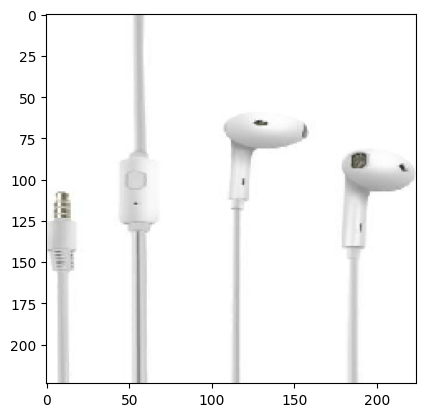

-----------------------------------------------------------------------
most similar products:


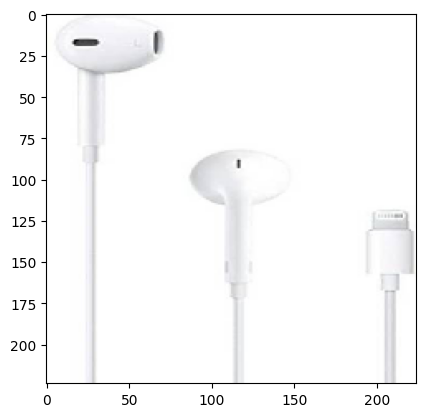

similarity score :  0.88092977


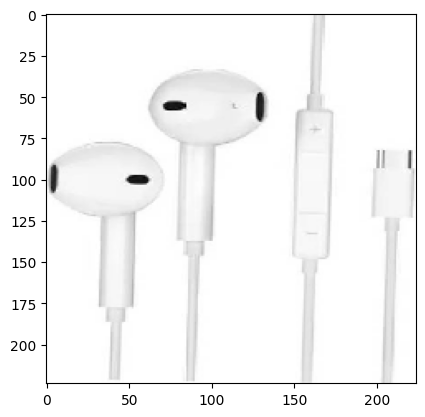

similarity score :  0.88032025


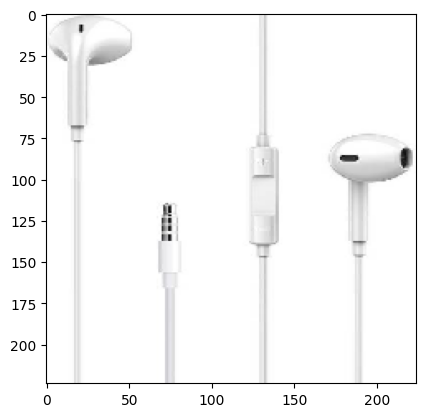

similarity score :  0.86345726


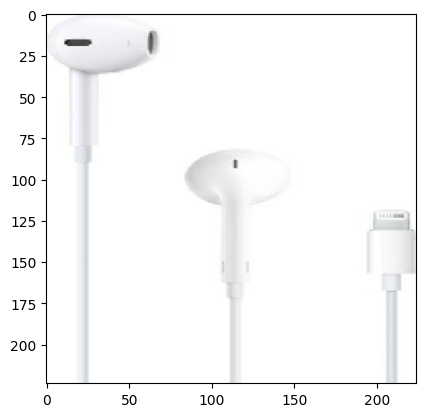

similarity score :  0.86039627


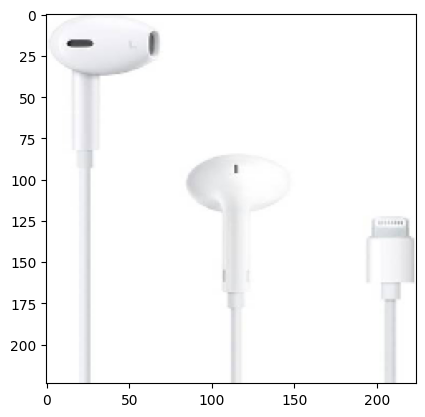

similarity score :  0.8487097
None


In [14]:
print(retrieve_most_similar_products(files[1]))

-----------------------------------------------------------------------
original product:


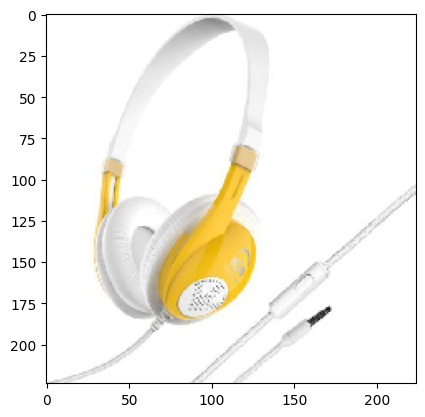

-----------------------------------------------------------------------
most similar products:


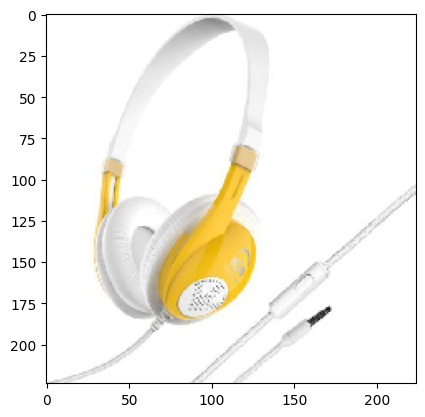

similarity score :  1.0000002


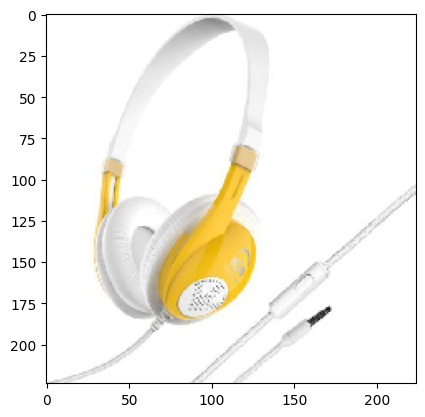

similarity score :  1.0000002


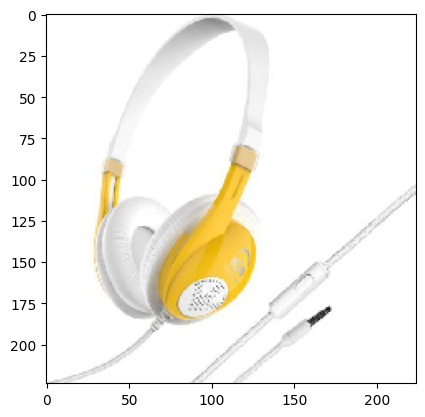

similarity score :  1.0000002


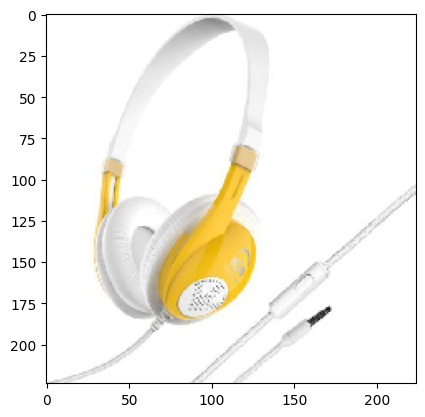

similarity score :  1.0000002


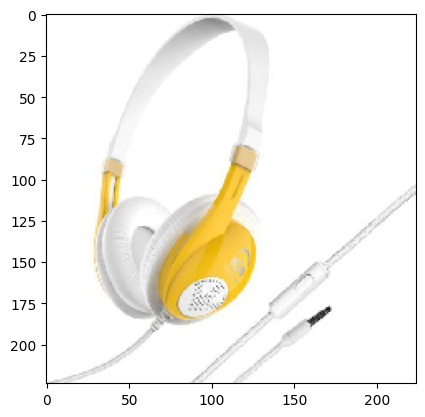

similarity score :  1.0000002
None


In [15]:
print(retrieve_most_similar_products(files[2]))

-----------------------------------------------------------------------
original product:


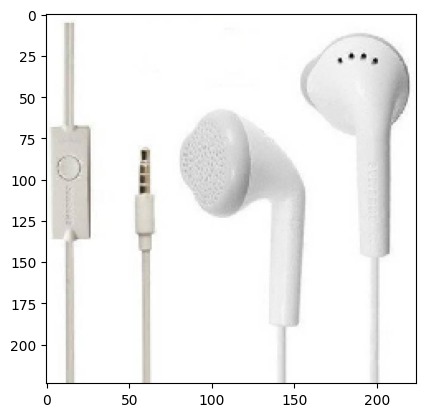

-----------------------------------------------------------------------
most similar products:


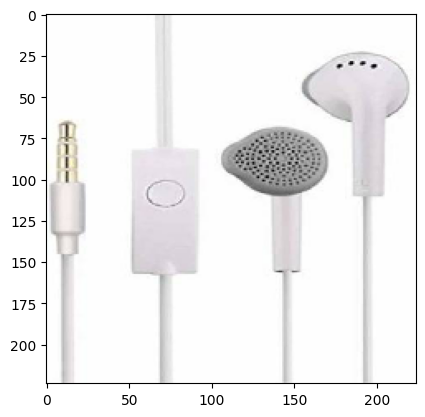

similarity score :  0.8437306


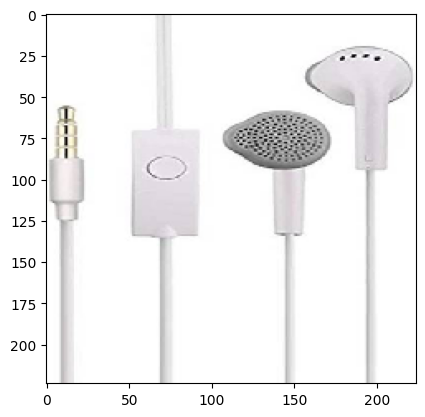

similarity score :  0.8403446


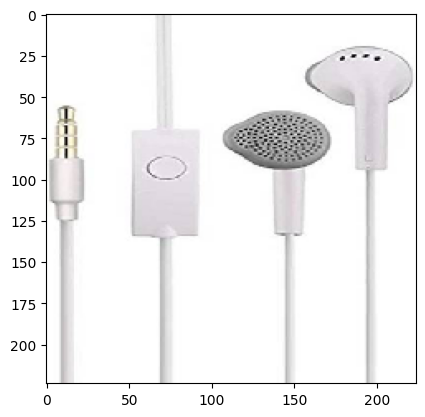

similarity score :  0.84034455


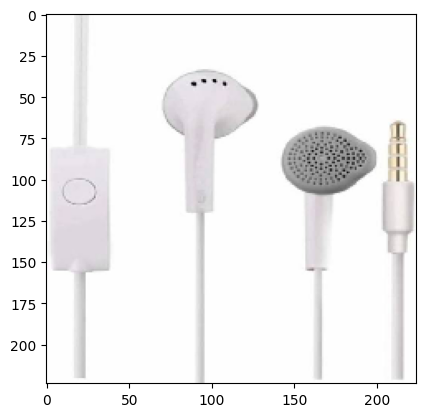

similarity score :  0.8347921


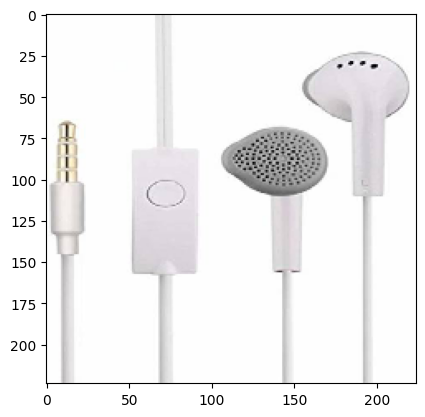

similarity score :  0.83433336
None


In [16]:
print(retrieve_most_similar_products(files[3]))

-----------------------------------------------------------------------
original product:


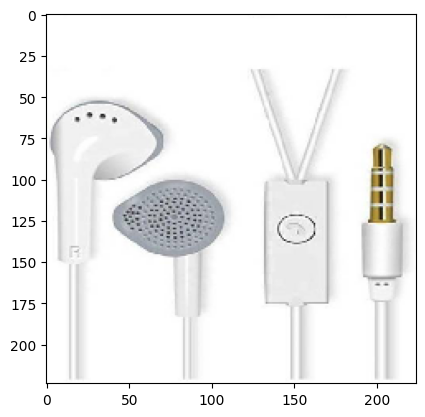

-----------------------------------------------------------------------
most similar products:


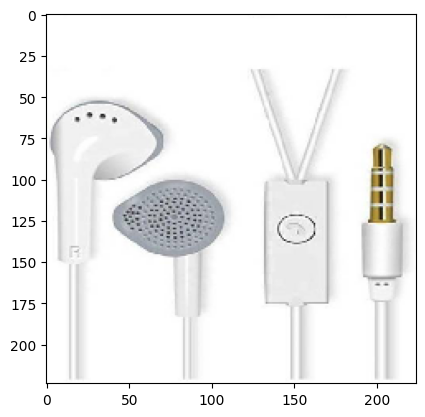

similarity score :  1.0000001


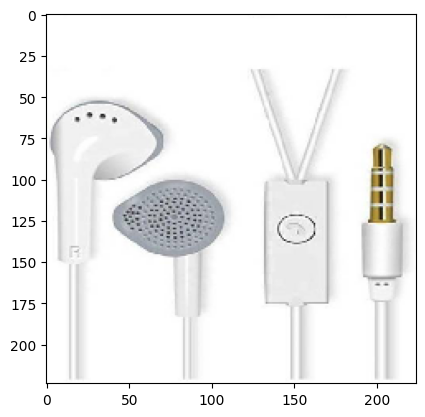

similarity score :  1.0000001


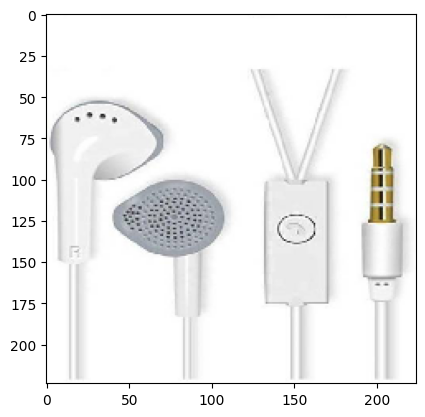

similarity score :  1.0000001


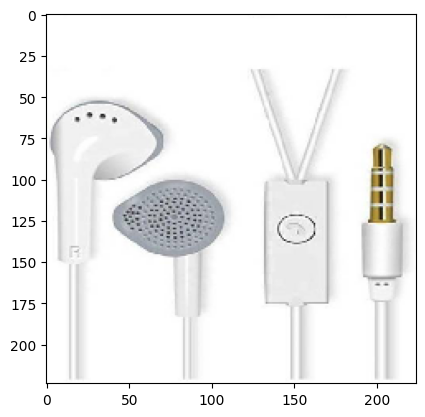

similarity score :  1.0000001


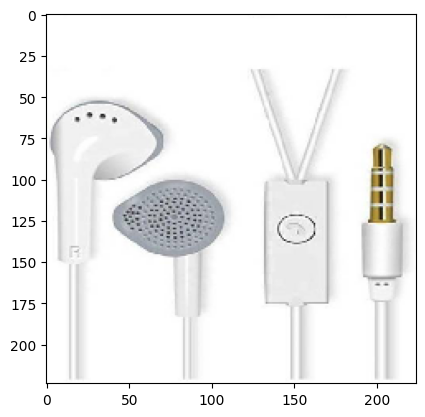

similarity score :  1.0000001
None


In [17]:
print(retrieve_most_similar_products(files[4]))

-----------------------------------------------------------------------
original product:


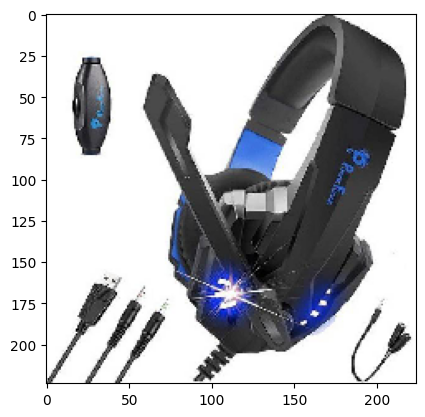

-----------------------------------------------------------------------
most similar products:


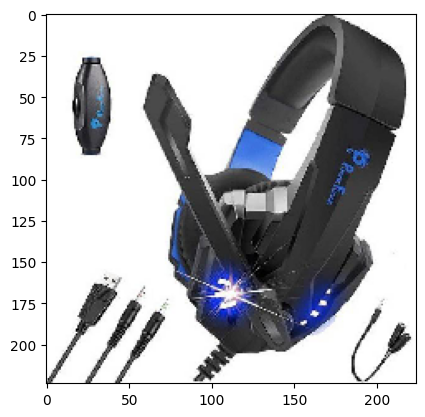

similarity score :  1.0


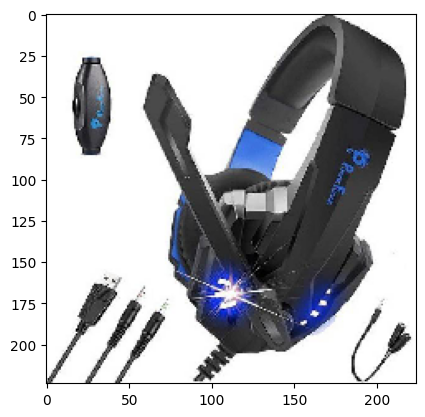

similarity score :  1.0


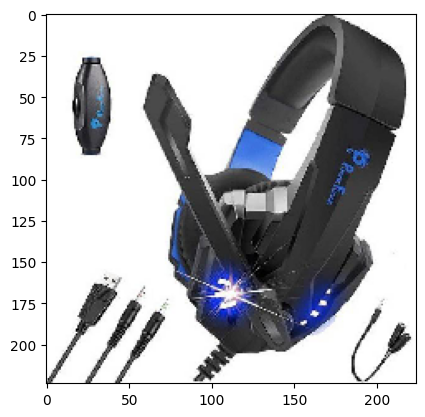

similarity score :  1.0


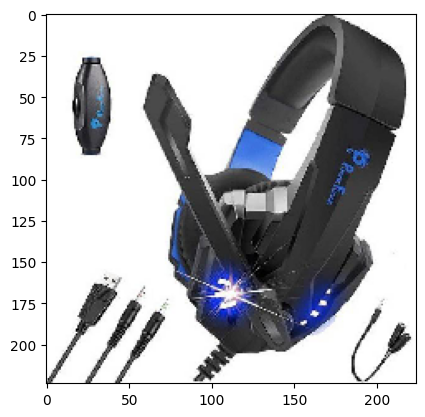

similarity score :  1.0


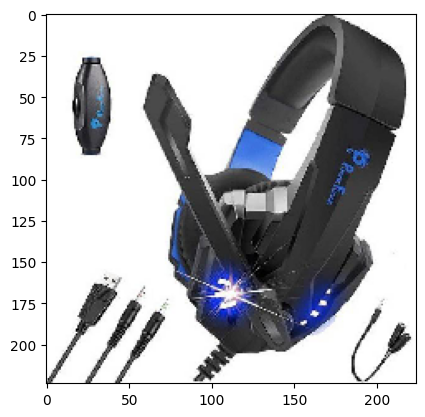

similarity score :  1.0
None


In [18]:
print(retrieve_most_similar_products(files[5]))

-----------------------------------------------------------------------
original product:


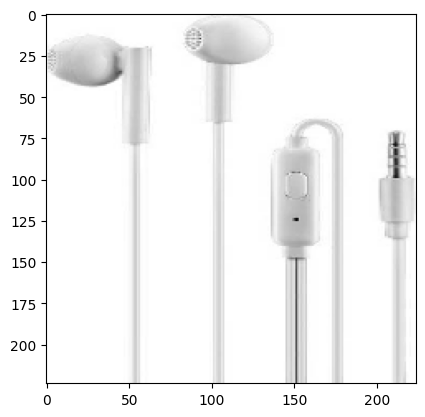

-----------------------------------------------------------------------
most similar products:


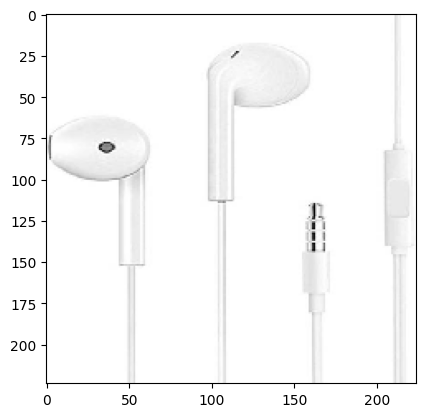

similarity score :  0.8795864


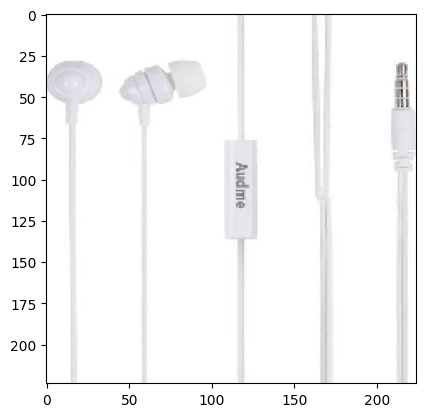

similarity score :  0.8686967


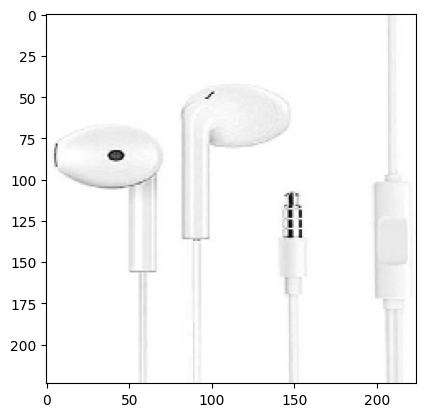

similarity score :  0.8611715


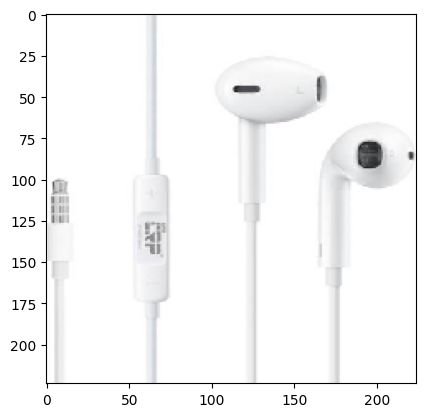

similarity score :  0.84869057


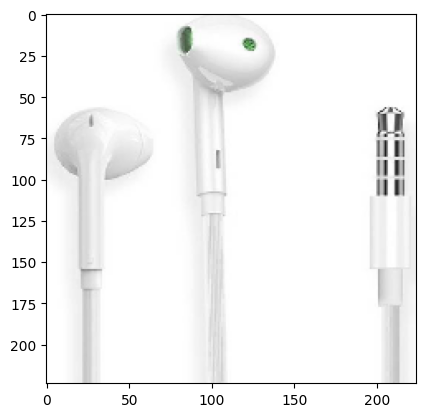

similarity score :  0.8397528
None


In [19]:
print(retrieve_most_similar_products(files[6]))

-----------------------------------------------------------------------
original product:


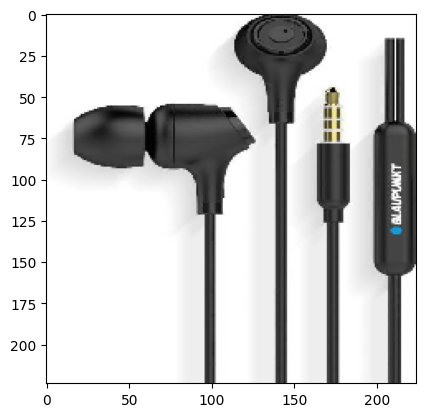

-----------------------------------------------------------------------
most similar products:


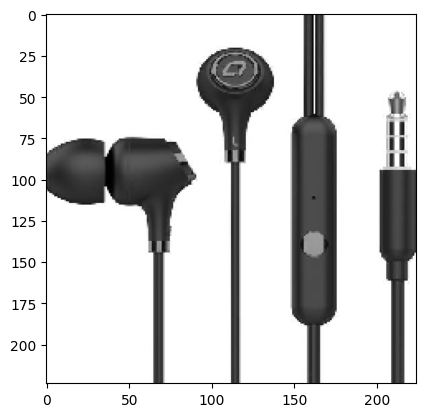

similarity score :  0.8693513


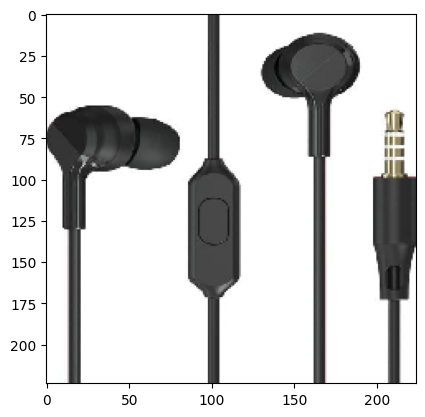

similarity score :  0.8227774


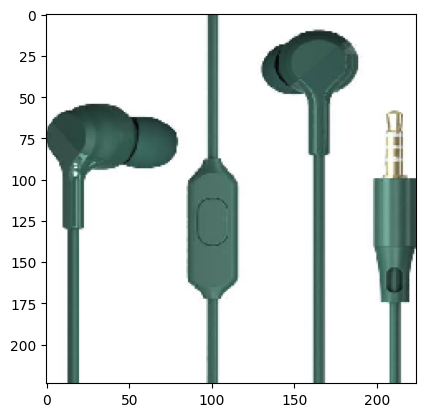

similarity score :  0.7996912


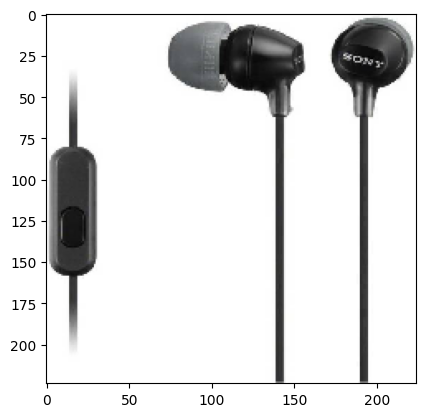

similarity score :  0.78820395


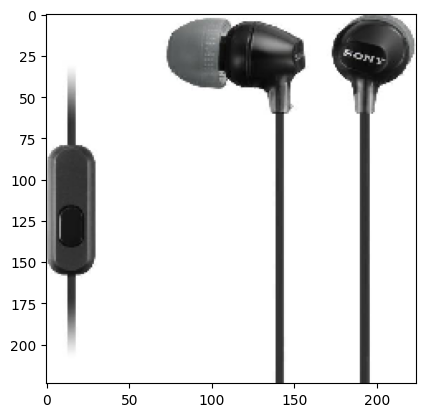

similarity score :  0.78704643
None


In [20]:
print(retrieve_most_similar_products(files[7]))

-----------------------------------------------------------------------
original product:


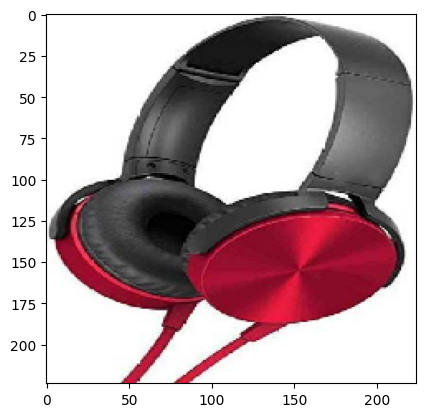

-----------------------------------------------------------------------
most similar products:


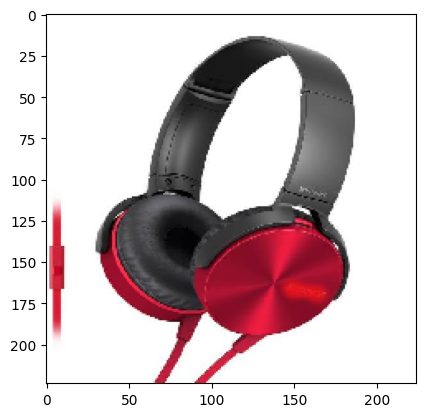

similarity score :  0.8415404


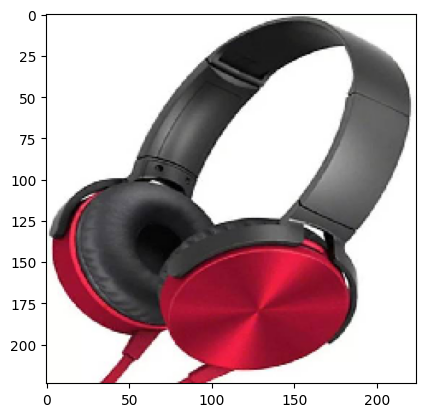

similarity score :  0.8404428


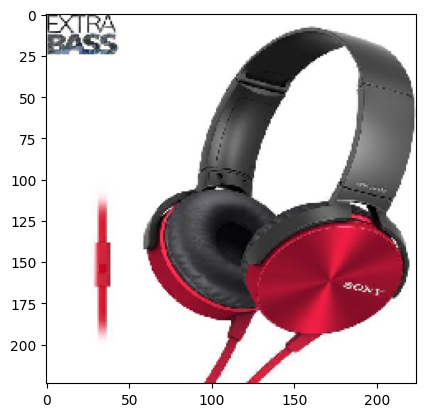

similarity score :  0.8391079


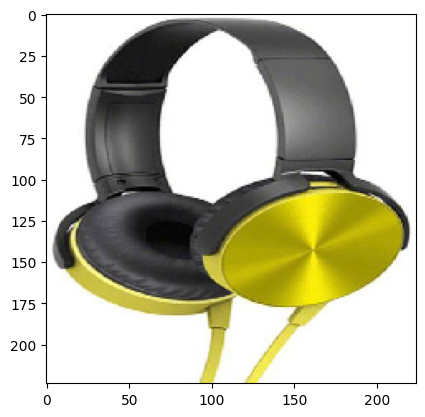

similarity score :  0.75628114


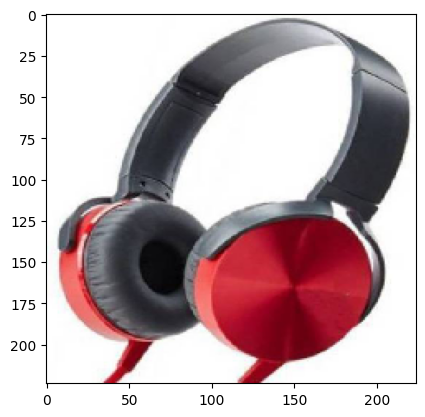

similarity score :  0.7471841
None


In [21]:
print(retrieve_most_similar_products(files[8]))

-----------------------------------------------------------------------
original product:


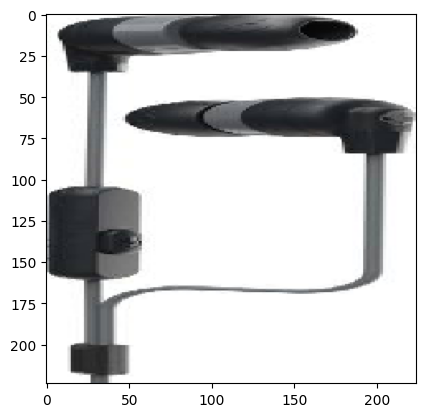

-----------------------------------------------------------------------
most similar products:


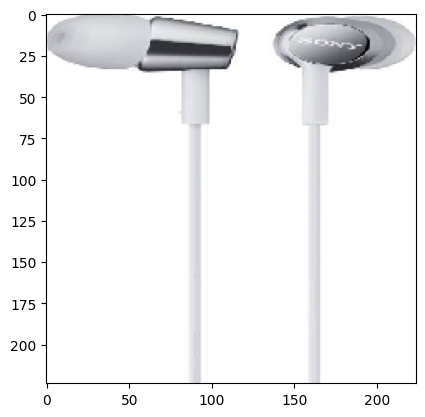

similarity score :  0.72012955


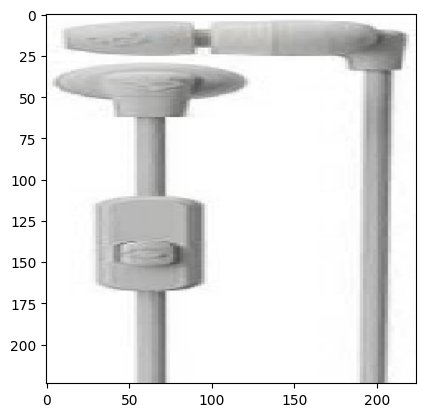

similarity score :  0.70352364


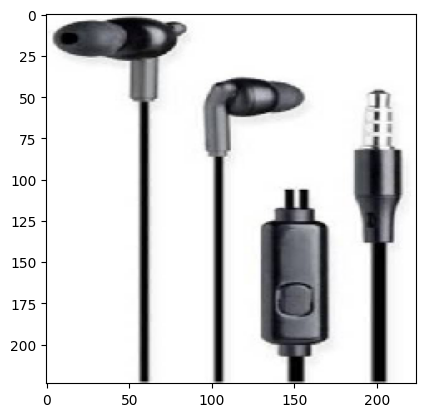

similarity score :  0.6636375


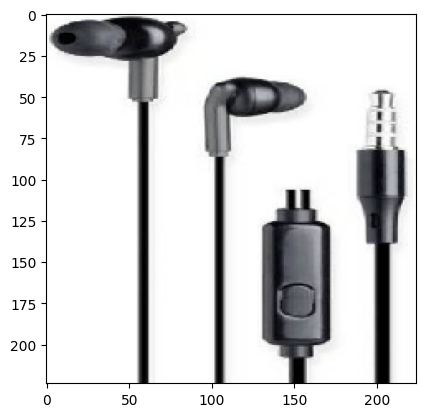

similarity score :  0.6482498


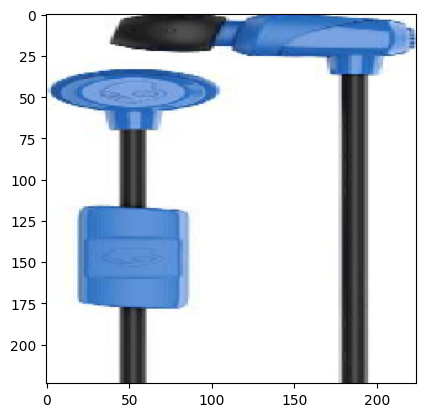

similarity score :  0.63963884
None


In [22]:
print(retrieve_most_similar_products(files[9]))